# EGD103 Assignment 1: Simulating a Simple Telecommunications System
In this assignment you will be using programming theory to help simulate a simple telecommunications system.

This assignment is split into two parts:
* **Part A (6%) is due Friday week 4**. In this part you will simulate sending a character through a noisy channel to a receiver.
* **Part B (24%) is due Friday week 7**. In this part you will employ some error control coding theory to try and reduce the amount of errors when sending messages.

<div style="background-color: #ffcccc; padding:10px">
    
## General Rules and Restrictions
* You must use Jupyter in the cloud (on https://jupyter.eres.qut.edu.au) to develop your solution.
* For the assignments you cannot work with friends or colleagues, or get help from anyone other than the EGD103 teaching team - it needs to be entirely your own work.
* You cannot use AI tools such as ChatGPT or Copilot to help develop your solution.
* Do not modify any function names, parameters or test cases provided in this notebook.
* Every function must be implemented in only one place within this .ipynb file (where it is already defined). Do not cut and paste to create duplicate definitions of the same function.
* Do not add any import statements. The only modules you are allowed to import are the ones that have been imported for you within this assignment template.
* You should only use Python language features that have been taught within this unit. If you use other features we will suspect acadamic misconduct and require you to attend meeting to authenticate your learning.
</div>

<div style="background-color: #ccccff ; padding:10px; font-size:x-large; font-weight: bold">
    Part A - due Friday week 4
</div>

## 1.1 An Introduction to Communications Systems
A simple communications system includes three core components:
1. **An encoder**. This takes the information to be transmitted (eg. audio for a phone call, video for streaming, text for an email) and converts it to code that can be electronically transmitted.
2. **A channel**. This is the medium through which the electronic signals are transmitted through.
3. **A decoder**. This receives code that has been transmitted and converts it back to information, performing the inverse process of the encoder.

In an ideal channel, no errors will occur during transmission, leading to the received information being the same as what was sent. However, all channels have some amount of noise present which can lead to errors occuring as they pass through the channel. This can lead to receiving a different message to what was sent. An example of this process is pictured below.

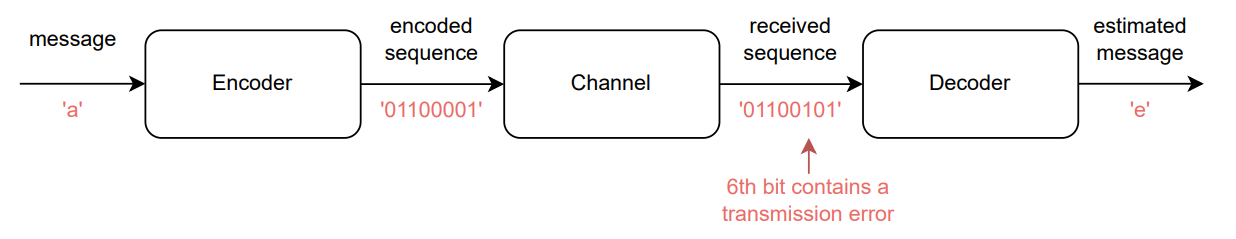

### 1.2 Introducing the <code>comms</code> Module
We have provided you with a module named <code>comms</code> to assist with simulating a simple communications system. The comms module includes functions that perform the main actions of a communications system: encoding, transmitting, and decoding. This module is imported using the code cell below. Make sure that the file 'comms.py' is located in the same location as this notebook.

In [1]:
# run this cell to import the comms module
import comms

To read documentation on the functions contained in this module, we can call the <code>help</code> function.

In [2]:
# run this cell to read documentation for the comms module
help(comms)

Help on module comms:

NAME
    comms

FUNCTIONS
    decode(byte)
        Decodes a byte back to a single character.

        Parameters:
        byte: a string of length 8 containing only 1s and 0s.

        Returns:
        character: The character representing the decoded byte.

        Example:
        For example, decode('01100001') will return 'a'.

    encode(character)
        Encodes the character to give a byte, which is an 8 character string containing only 1s and 0s.

        Parameters:
        character: a string containing a single character.

        Returns:
        encoded_character: The character encoded into a bitstream.

        Example:
        For example, encode('a') will return the byte '01100001'.

    transmit_bitstream(bitstream, BER, seed=None)
        Simulates the process of transmitting a bitstream through a noisy communications channel.

        Parameters:
        bitstream: a string containing only 1s and 0s.
        BER (bit error rate): the probabil

### 1.3 Using the <code>comms</code> Module (2 marks)
In this section we want to test that you can correctly call functions imported from the comms module.

<div style="background-color: #b2efb2; padding:10px; font-size:small; font-weight: bold">
<p>Task: Call the <code>encode</code> function to find the encoded version of the character <code>'b'</code>. Should return <code>'01100010'</code>.</p>

In [3]:
# insert your code here

<div style="background-color: #b2efb2; padding:10px; font-size:small; font-weight: bold">
<p>Task: Call the <code>decode</code> function to find the decoded version of the bitstream <code>'00110011'</code>. Should return <code>'3'</code>.</p>

In [4]:
# insert your code here

<div style="background-color: #b2efb2; padding:10px; font-size:small; font-weight: bold">
<p>Task: Call the <code>transmit_bitstream</code> function to find the bitstream that is received when sending <code>'10000100'</code> with a bit error probability of 0.2 and a seed of 1. Should return <code>'00000100'</code>.</p>

In [5]:
# insert your code here

### 1.4 Sending a Character (2 marks)
We would now like you to create your own user-defined function that will simulate sending a character through a communications system. Your solution must call functions from the <code>comms</code> module.

<div style="background-color: #b2efb2; padding:10px; font-size:small; font-weight: bold">
<p></p>Task: Create a function that accepts three inputs: a character, a bit error rate that defaults to 0.01, and a seed that defaults to None.</p>

The function should:
1. Encode the character.
2. Transmit with the supplied bit error rate and seed.
3. Decode the received bitstream.
4. Return the received character.

In [6]:
def send_character(character, BER=0.01, seed=None):
    pass

In [7]:
# test case 1: Run this many times. 
# you should observe it usually returns 'a', but sometimes there will be a transmission error
send_character('a')

In [8]:
# test case 2: should return 'a', meaning no transmission error
# since a seed is provided, will always return the same character
send_character('a', seed=1)

In [9]:
# test case 3: should return 'i', meaning there is a transmission error
# since a different seed was used, we get a different 'random' result than the previous test case
send_character('a', seed=6)

In [10]:
# test case 4: should return 'c'
# Here we have changed the default bit error probability to 0.3
send_character('a', BER=0.3, seed=3)

### 1.5 Transmission Error Probability (2 marks)
You should now have seen that sometimes the received character will be different to the sent character due to noise in the communications channel. With the current system we have set up, an error will occur if just a single bit changes during transmission.

The probability of a bitstream containing at least one bit error can be calculated with the following equation: $1 - (1 - p)^n$, where $p$ is the bit error rate and $n$ is the number of bits in the bitstream. $p$ must be a number between 0 and 1 inclusive, while $n$ must be a positive integer.

<div style="background-color: #b2efb2; padding:10px; font-size:small; font-weight: bold">
Task: Create a function that accepts two inputs: the number of bits and a bit error rate. The function should output the probability of the bitstream containing at least one bit error. The function should raise an exception if either input has an invalid value (eg. wrong data type, invalid value). 
</div>

In [11]:
def compute_transmission_error_rate(n_bits, BER):
    # replace pass with your solution
    pass

In [12]:
# test case 1 - sending a single character with the default bit error rate of 1%
# should return 0.07725530557207994
compute_transmission_error_rate(8, 0.01)

In [13]:
# test case 2 - sending 10 characters with a higher bit error rate of 5%
# should return 0.9834846256149864
compute_transmission_error_rate(10*8, 0.05)

In [14]:
# test case 3 - using an invalid value for n_bits
try:
    compute_transmission_error_rate(3.4, 0.01)
except:
    print('Correct. Your function raises an exception.')
else:
    print('Incorrect. Your function needs to raise an exception.')

Incorrect. Your function needs to raise an exception.


In [15]:
# test case 4 - using an invalid value for n_bits
try:
    compute_transmission_error_rate(-2, 0.01)
except:
    print('Correct. Your function raises an exception.')
else:
    print('Incorrect. Your function needs to raise an exception.')

Incorrect. Your function needs to raise an exception.


In [16]:
# test case 5 - using an invalid value for BER
try:
    compute_transmission_error_rate(8, 1.1)
except:
    print('Correct. Your function raises an exception.')
else:
    print('Incorrect. Your function needs to raise an exception.')

Incorrect. Your function needs to raise an exception.


In [17]:
# test case 6 - using an invalid value for BER
try:
    compute_transmission_error_rate(8, -2)
except:
    print('Correct. Your function raises an exception.')
else:
    print('Incorrect. Your function needs to raise an exception.')

Incorrect. Your function needs to raise an exception.


<div style="background-color: #ccccff ; padding:10px; font-size:x-large; font-weight: bold">
    Part B - due Friday week 7
</div>

In part A of the assignment, you should have noticed that communication errors can occur quite frequently through a noisy channel. With a bit error rate of 1%, each character has more than a 7% chance of being received incorrectly.

In Part B of the assignment, you will apply error-control coding to reduce the number of communication errors. The basic idea of error-control coding is to add extra redundant bits to the encoded character to give it error detection (and sometimes error correction) properties.

The mark allocations next to each question describe that questions's weighting when marking for programming correctness (12 marks total). For Part B, note that you will also be marked based on your code quality (6 marks) and on demonstrating key programming skills (6 marks). You should consult the CRA on Canvas for more details.

### 2.1 Summing Bits (2 marks)
The error-control coding strategy you will employ for this assignment requires you to be able to sum the values of a bitstream together. Because of this, we will get you to define a function that can do this task.

<div style="background-color: #b2efb2; padding:10px; font-size:small; font-weight: bold">
Task: Create a user-defined function that accepts one input: a bitstream. It should output the sum of all the digits in the bitstream.
</div>

In [18]:
def sum_bits(bitstream):
    # replace pass with your own solution
    pass

In [19]:
# test case 1: should return 3
sum_bits('10110')

In [20]:
# test case 2: should return 6
sum_bits('111011001')

In [21]:
# test case 3: should return 0
sum_bits('000')

### 2.2 Checkbit Encoding (2 marks)
A simple encoding strategy to help detect transmission errors is to add a checkbit to the end of a bitstream before transmitting it. A checkbit is a bit (either '0' or '1') that is added to the end of a bitstream to ensure that the sum of all the bits is an even number.

For example, consider the bitstream '10010'. The sum of all the bits in the bitstream is 2, which is even. This means we should add '0' as the checkbit so its sum remains even, returning the bitstream '100100'.

As another example, consider the bitstream '1101'. The sum of all the bits in the bitstream is 3, which is odd. This means we should add '1' as the checkbit so that the sum becomes even, returning the bitstream '11011'.

<div style="background-color: #b2efb2; padding:10px; font-size:small; font-weight: bold">
Task: Create a user-defined function that accepts one input: a character. The function should encode the character by using the comms module. It should then add a checkbit to the end of the encoded character such that the sum of all the bits is an even number.
</div>

In [22]:
def checkbit_encode(character):
    # replace pass with your own solution
    pass

In [23]:
# test case 1: should return '011000011'
checkbit_encode('a')

In [ ]:
# test case 2: should return '010000010'
checkbit_encode('A')

In [ ]:
# test case 3: should return '011110101'
checkbit_encode('z')

In [24]:
# test case 4: should return '010110100'
checkbit_encode('Z')

### 2.3 Detecting Errors (1 mark)
Adding a checkbit now provides the decoder with some error detection capabilities. We know that every bitstream must have an even sum in order to be valid. Any bitstream with an odd sum must contain an error in it.

<div style="background-color: #b2efb2; padding:10px; font-size:small; font-weight: bold">
Task: Create a user-defined function that accepts one input: a bitstream. It should output the Boolean True if an error is detected (ie. the bitstream sum is odd) and the Boolean False if no error is detected (ie. the bitstream sum is even).
</div>

In [25]:
def detect_error(bitstream):
    # replace pass with your own solution
    pass

In [26]:
# test case 1: should return False
detect_error('10010')

In [27]:
# test case 2: should return True
detect_error('111')

In [ ]:
# test case 3: should return False
detect_error('111000001')

In [ ]:
# test case 1: should return True
detect_error('0010011')

### 2.4 Checkbit Decoding (1 mark)
Once we receive a bitstream with a checkbit and no error is detected, we need to know how to decode the message. This is very straight forward:
1. Remove the last character from the bitstream (eg. '011000101' -> '01100010').
2. Decode using the comms module ('01100010' -> 'b').

<div style="background-color: #b2efb2; padding:10px; font-size:small; font-weight: bold">
Task: Create a user-defined function that accepts one input: a bitstream. You should perform checkbit decoding of the bitstream by removing the last character and then decoding with the comms module.
</div>

In [ ]:
def checkbit_decode(bitstream):
    # replace pass with your own solution
    pass

In [ ]:
# test case 1: should return 'a'
checkbit_decode('011000011')

In [ ]:
# test case 2: should return 'A'
checkbit_decode('010000010')

In [ ]:
# test case 3: should return 'z'
checkbit_decode('011110101')

In [ ]:
# test case 4: should return 'Z'
checkbit_decode('010110100')

### 2.5 Send Character with Checkbit (2 marks)
We would like you to simulate sending a character like you did in Part A - but this time you will implement the checkbit strategy to help reduce the number of transmission errors. To do this you will need to call the functions you have programmed earlier in the assignment.

<div style="background-color: #b2efb2; padding:10px; font-size:small; font-weight: bold">
<p></p>Task: Create a function that accepts three inputs: a character, a bit error rate that defaults to 0.1, and a seed that defaults to None.</p>

The function should:
1. Encode the character into a bitstream that includes a checkbit using your function from 2.2 (eg. 'b' -> '011000101').
2. Transmit the bitstream using the comms module with the supplied bit error rate and seed.
3. Test if an error is detected in the received bitstream using your function from 2.3. While an error is detected, you will need to increase the seed by 1 (if it was given) and then retransmit the message by repeating step 2.
4. Once no error is detected, perform checkbit decoding using your function from 2.4 (eg. '011000101' -> 'b').
5. Return the received character.
</div>

In [28]:
def send_character_with_checkbit(character, BER=0.01, seed=None):
    # replace pass with your own solution
    pass

In [29]:
# Test case 1: Should return 'a'
send_character_with_checkbit('a', seed=1)

In [30]:
# Test case 2: Should return 'b'
send_character_with_checkbit('b', seed=3)

In [31]:
# Test case 3: Should return 'S'
send_character_with_checkbit('c', BER=0.1, seed=2)

In [32]:
# Test Case 4: 
# run this many times
# should find result occasionally contains an error, but far less frequent than before
send_character_with_checkbit('a')

### 2.6 Sending a Text Message (2 marks)
At this point you have implemented two different strategies to send a character through a communications channel: a simple approach in 1.5 and then a checkbit approach in 2.5. We would now like you to create a function that can send an entire text message with either of these approaches.

<div style="background-color: #b2efb2; padding:10px; font-size:small; font-weight: bold">
<p></p>Task: Create a function that accepts: a string, a bit error rate that defaults to 0.1, and a checkbit condition that defaults to False. For each character in the string, the function should send that character with the supplied bit error rate and a seed of None. The character should be sent using your function from 1.5 if checkbit is False, and using your function from 2.5 is checkbit is True. The function should return the received string.
</div>

In [33]:
def send_message(text, BER=0.01, checkbit=False):
    # replace pass with your own solution
    pass

In [34]:
# Test case 1: Testing without checkbit encoding
# Run this many times
# This will should usually contain multiple errors in it
send_message('This is a test message. Hopefully, there are no transmission errors.')

In [35]:
# Test case 2: Testing with checkbit encoding
# Run this many times
# This will contain far less errors on average
send_message('This is a test message. Hopefully, there are no transmission errors.', checkbit=True)

### 2.7 Investigating Errors (2 marks)
When sending a text message in 2.6, you should have seen that communications errors occur quite frequently when we don't use a checkbit and then much less frequently when using the checkbit strategy. We would like to explore these errors in some more detail in this section by simulating the transmission of a character many times and then summarising the results together.

<div style="background-color: #b2efb2; padding:10px; font-size:small; font-weight: bold">
<p></p>Task: Create a function that accepts: a character, a bit error rate that defaults to 0.1, and a checkbit condition that defaults to False. Your function should use a loop to send the character ten-thousand times with the supplied bit error rate and a seed of None. The character should be sent using your function from 1.5 if checkbit is False, and using your function from 2.5 is checkbit is True. Your function should keep track on the frequency observed for each received character and return the results in a dictionary, where the keys are characters that were received, and the values are the number of times that character was received. 
</div>

In [ ]:
def test_communications(character, BER=0.01, checkbit=False):
    # replace pass with your own solution
    pass

In [ ]:
# Test case 1: without a checkbit
# 'a' should be observed roughly 9230 times on average, but will change each run
# the characters 'e', '!', '`', 'c', 'á', 'A', 'i', 'q' should have large frequencies
test_communications('a')

In [ ]:
# Test case 2: with a checkbit
# 'a' should be observed roughly 9960 times on average, but will change each run
test_communications('a', checkbit=True)

After testing your error summary function, you should see that sending characters with a checkbit is much more reliable than without a checkbit, with far fewer errors occuring.

Another interesting observation you should have is related to sending without a checkbit. When an error occurs sending 'a', it is usually received as one of 8 characters: 'e', '!', '`', 'c', 'á', 'A', 'i', or 'q'.

<div style="background-color: #b2efb2; padding:10px; font-size:small; font-weight: bold">
<p></p>Task: Explain why you are likely to receive one of 8 specific characters if there is a transmission error when not using a checkbit. Hint: compare the encoded versions of the characters.
</div>

Write your answer in this Markdown cell.

In [ ]:
# include code in this cell that supports your above reasoning